In [1]:
using Gadfly

In [2]:
zero_one_loss(x) = (sign.(-x) + 1) ./ 2

zero_one_loss (generic function with 1 method)

In [3]:
logistic_loss(x) = log.(1 + exp.(-x))

logistic_loss (generic function with 1 method)

In [4]:
exp_loss(x) = exp.(-x)

exp_loss (generic function with 1 method)

In [5]:
hinge_loss(x) = max.(0, 1-x)

hinge_loss (generic function with 1 method)

In [6]:
function smoothing_hinge_loss(x)
    if x .>= 1
        return 0
    elseif x .<= 0
        return 0.5-x
    else
        return 0.5(1-x).^2
    end
end

smoothing_hinge_loss (generic function with 1 method)

In [7]:
x = collect(-3:0.001:3);

In [8]:
l1 = layer(x = x, y = zero_one_loss(x), Geom.line, Theme(default_color=colorant"black", line_style = :solid));

In [9]:
l2 = layer(x = x, y = logistic_loss(x), Geom.line, Theme(default_color=colorant"black", line_style = :dash));

In [10]:
l3 = layer(x = x, y = exp_loss(x), Geom.line, Theme(default_color=colorant"black", line_style = :dot));

In [11]:
l4 = layer(x = x, y = hinge_loss(x), Geom.line, Theme(default_color=colorant"black", line_style = :dashdot));

In [12]:
l5 = layer(x = x, y = smoothing_hinge_loss.(x), Geom.line, Theme(default_color=colorant"black", line_style = :dashdotdot));

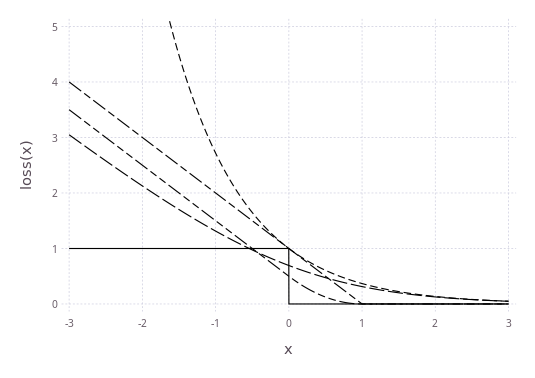

In [13]:
p = plot(l1,l2,l3,l4,l5, Coord.cartesian(ymin=0, ymax=5), Guide.ylabel("loss(x)"))

In [14]:
draw(PDF("loss_functions.pdf", 24cm, 16cm), p)